In [ ]:
'''
期末專題實作提示（基本目標）
1. 透過開發者工具觀察網站在列出 News Feed 這邊是屬於動態網站還是靜態網站，或是有 API 可以直接送 requests

回答：動態網站會透過瀏覽器的捲軸到一定的高度觸發News Feed API非同步抓取新聞資料（每次30筆）, News Feed 可以透過 API （如下）方式直接取資料
     https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=0&len=100
     len: 一次取多少筆, startNewsID: 從ＩＤ？開始取資料
'''

In [23]:
'''
2. 根據網站特性選擇 requests / BeautifulSoup / selenium 等工具進行爬蟲
'''
import requests # 引入函式庫
import json

#因為news feed 一次只能取100筆需要分5次取
IDs = [0, 100, 200, 300, 400]

response = []
def retriveNewsFeeds( ID=0, page_size=100 ):
     print( 'https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=' + str(ID) + '&len=' + str(page_size) )
     # 標網址
     r = requests.get('https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=' + str(ID) + '&len=' + str(page_size) ) 
     response.append(json.loads(r.text)) # 模擬發送請求的動作, 並將結果放入list中
     
for id in IDs:
     retriveNewsFeeds(id)    

print( "共" + str(len(response)) + "筆" )

https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=0&len=100
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=100&len=100
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=200&len=100
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=300&len=100
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=400&len=100
共5筆


In [31]:
'''
取出500篇的文章資料, 並放到陣列中
'''
items = [] 
for res in response:
     for key in res:
         if key == 'items': #文章資料
            items.extend(res[key])

print("共" + str(len(items)) + "文章")
print(items[0])
print(items[499])

共500文章
{'itemuid': '68747470733A2F2F7777772E6974686F6D652E636F6D2E74772F6E6577732F313337303338', 'newsid': '0000017185CD815568747470733A2F2F7777772E6974686F6D652E636F6D2E74772F6E6577732F313337303338', 'itemsrctype': 2, 'ctype': 5, 'title': 'Webhooks URL洩漏可致Slack用戶受釣魚攻擊 | iThome', 'description': '在GitHub中的公開程式碼中，包含了許多Webhook URL，攻擊者可利用這些憑證資訊對使用者進行釣魚攻擊', 'thumbimgurl': 'https://s4.itho.me/sites/default/files/field/image/webhook_configuration.jpg', 'linkurl': 'https://www.ithome.com.tw/news/137038', 'nationID': 'TW', 'publishtime': 1587087769941, 'bucketids': ['info_security_tw'], 'bucketgrpids': ['tech_tw'], 'metrics': {'socialScorer': {'fb_shares': 0, 'fb_likes': 0, 'gplus_likes': 0, 'pin_counts': 0, 'linkedin_shares': 0, 'reddit_shares': 0, 'timesection': 1587088800000}, 'uidMetrics': {'likesize': 0, 'sharesize': 0, 'collectsize': 0, 'subscribersize': 0, 'commentsize': 0, 'socialsonarlogsize': 1, 'influStars': 3, 'viewsize': 0, 'timesection': 1587081600000}, 'keywordtrend': 0, 'uidacts

In [103]:
'''
3. 整理整理成 pandas.DataFrame 後做簡單的統計可以用 matplotlib.pyplot 或是pandas 內建的 function 畫圖 (histogram / pie chart ...)
'''

import pandas as pd
import datetime
pd.__version__
from string import Template
t = Template('$year-$month-$day')
df = pd.DataFrame(items)
df["publishymd"] = df['publishtime'].apply(lambda x: (datetime.datetime.fromtimestamp(int(x)/1000)))
df["publish_date"] = df["publishymd"].apply( lambda x: 
t.substitute(year=str(x.year).zfill(4), month=str(x.month).zfill(2), day= str(x.day).zfill(2))) 

print(df.head(1))
print(df.columns)

bucketgrpids           bucketids  ctype  \
0    [tech_tw]  [info_security_tw]      5   

                                         description  isCollect  isLike  \
0  在GitHub中的公開程式碼中，包含了許多Webhook URL，攻擊者可利用這些憑證資訊對...      False   False   

   isLocalUpload  itemsrctype  \
0          False            2   

                                             itemuid  \
0  68747470733A2F2F7777772E6974686F6D652E636F6D2E...   

                                 linkurl  \
0  https://www.ithome.com.tw/news/137038   

                                             metrics nationID  \
0  {'socialScorer': {'fb_shares': 0, 'fb_likes': ...       TW   

                                              newsid    publishtime  \
0  0000017185CD815568747470733A2F2F7777772E697468...  1587087769941   

                                         thumbimgurl  \
0  https://s4.itho.me/sites/default/files/field/i...   

                                   title              publishymd publish_date  
0  Webhooks URL洩漏可致Slack

In [104]:
# 500 篇文章發行的日期分佈
df.groupby(by = 'publish_date')["itemuid"].count()

publish_date
2020-04-15     50
2020-04-16    372
2020-04-17     78
Name: itemuid, dtype: int64

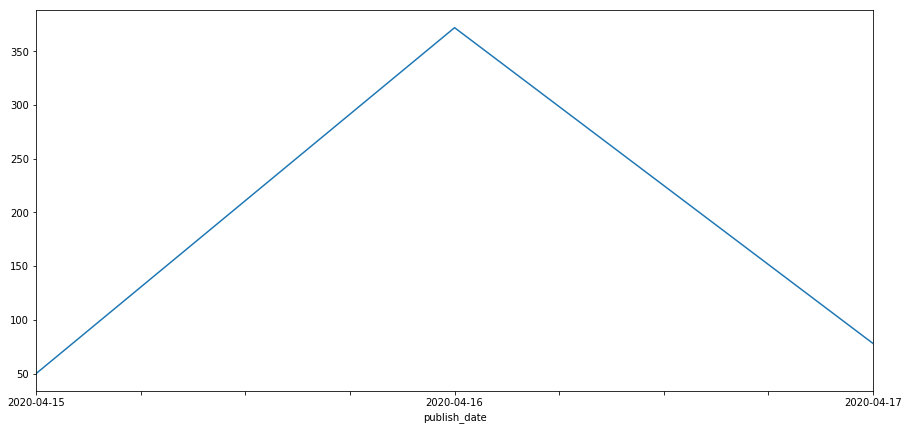

In [105]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(by = 'publish_date').count()["itemuid"].plot(ax=ax)
